In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten ,Dropout

## Get the data and pre-process it.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

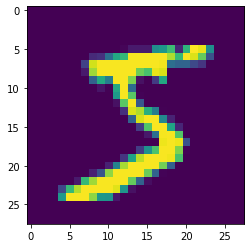

In [3]:
plt.imshow(X_train[0])

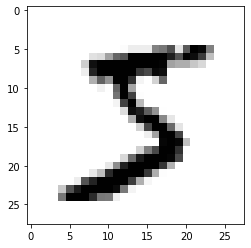

In [4]:
plt.imshow(X_train[0], cmap='binary')

In [5]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

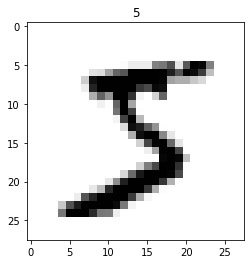

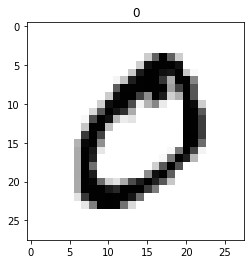

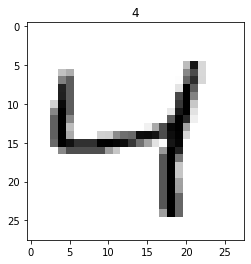

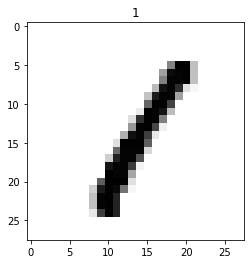

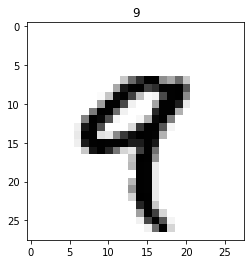

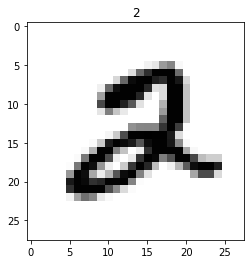

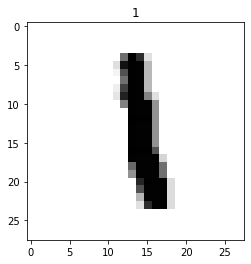

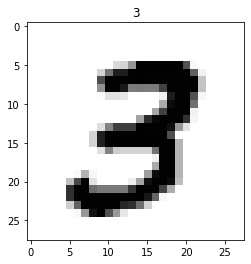

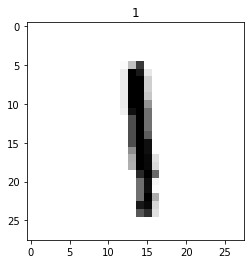

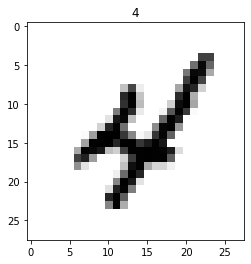

In [6]:
for i in range(10):
    plot_input_img(i)

In [7]:
# Pre Process the images

#Normalizing the image to [0, 1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape / expand the dimensions of images to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Convert classes to one hot encoder
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer='adam', loss=tensorflow.keras.losses.categorical_crossentropy, metrics='accuracy')

In [12]:
# callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

# ModelCheckpoint
mc = ModelCheckpoint("models/best_model.h5", monitor='val_acc', verbose=1, save_best_only=True)

cb = [es, mc]

## Model Training

In [13]:
his = model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=cb)

Epoch 1/10
1313/1313 [==============================] - 30s 22ms/step - loss: 0.2146 - accuracy: 0.9345 - val_loss: 0.0778 - val_accuracy: 0.9765
Epoch 2/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0734 - accuracy: 0.9776 - val_loss: 0.0597 - val_accuracy: 0.9817
Epoch 3/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0477 - val_accuracy: 0.9864
Epoch 4/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 5/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 6/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0415 - val_accuracy: 0.9879
Epoch 7/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0403 -

In [14]:
import os.path
if os.path.isfile('models/best_model.h5') is False:
    model.save('models/best_model.h5')

In [15]:
model_S = tensorflow.keras.models.load_model('models/best_model.h5')

In [16]:
score = model_S.evaluate(X_test, y_test)
print(f" the model accuracy is {score[1]} ")

313/313 [==============================] - 2s 6ms/step - loss: 0.0297 - accuracy: 0.9914
 the model accuracy is 0.9914000034332275 
